# DBSCAN

## Implementando BDSCAN

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

from itertools import product

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

### Preraparando los datos de prueba

In [2]:
# Generate data
X, y, c = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42, cluster_std=0.8, return_centers=True)

# Dataframe
df = pd.DataFrame(
    {
        'x1' : X[:,0],
        'x2' : X[:,1],
        'y' : y
    }
)

df.head()

,x1,x2,y
0,-7.918909,6.760982,3
1,-9.037137,-6.923545,2
2,6.391721,1.326531,1
3,-2.822884,7.843474,0
4,-5.918656,-7.206570,2


In [3]:
# Dataframe centers
df_centers = pd.DataFrame(
    {
        'x1' : c[:,0],
        'x2' : c[:,1],
    }
)

df_centers

,x1,x2
0,-2.509198,9.014286
1,4.639879,1.973170
2,-6.879627,-6.880110
3,-8.838328,7.323523


In [4]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1' : X_m[:,0],
        'x2' : X_m[:,1],
    }
)

df_moons.head()

,x1,x2
0,0.084154,0.113341
1,1.050915,0.154710
2,-0.716555,0.675608
3,0.060932,0.926542
4,-1.005525,0.336425


### Visualización de datos

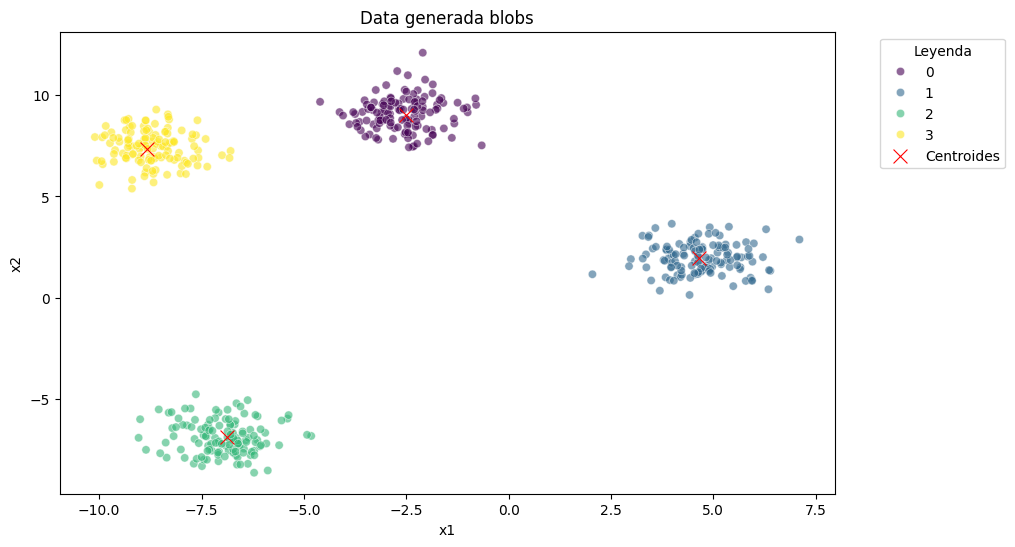

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue=y, data=df, palette='viridis', alpha=0.6)
sns.scatterplot(x='x1', y='x2', data=df_centers, color='red', s=100, marker='x', label='Centroides')
plt.title('Data generada blobs')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

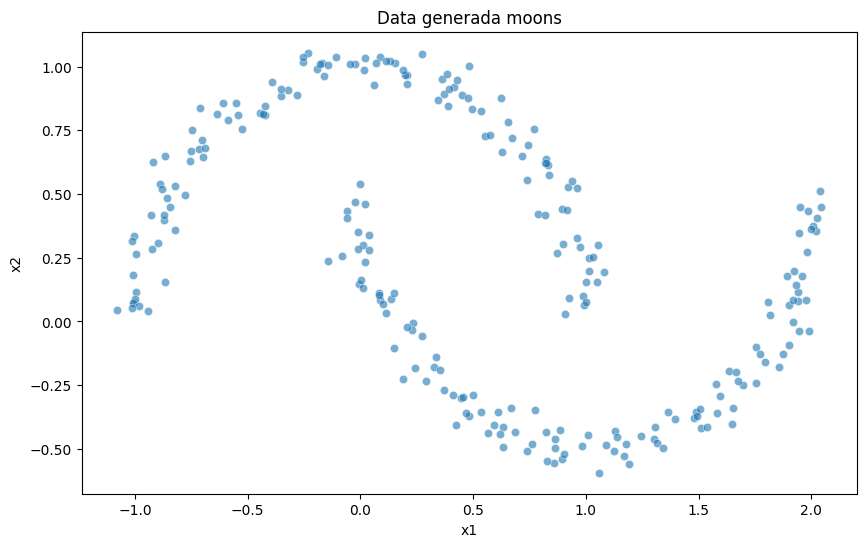

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', data=df_moons, palette='viridis', alpha=0.6)
plt.title('Data generada moons')
plt.show()

### Implementando DBSCAN

In [7]:
model = DBSCAN(eps=0.3, min_samples=3)
y_m_pred = model.fit_predict(X_m)
df_moons['cluster'] = y_m_pred
df_moons.head()

,x1,x2,cluster
0,0.084154,0.113341,0
1,1.050915,0.154710,1
2,-0.716555,0.675608,1
3,0.060932,0.926542,1
4,-1.005525,0.336425,1


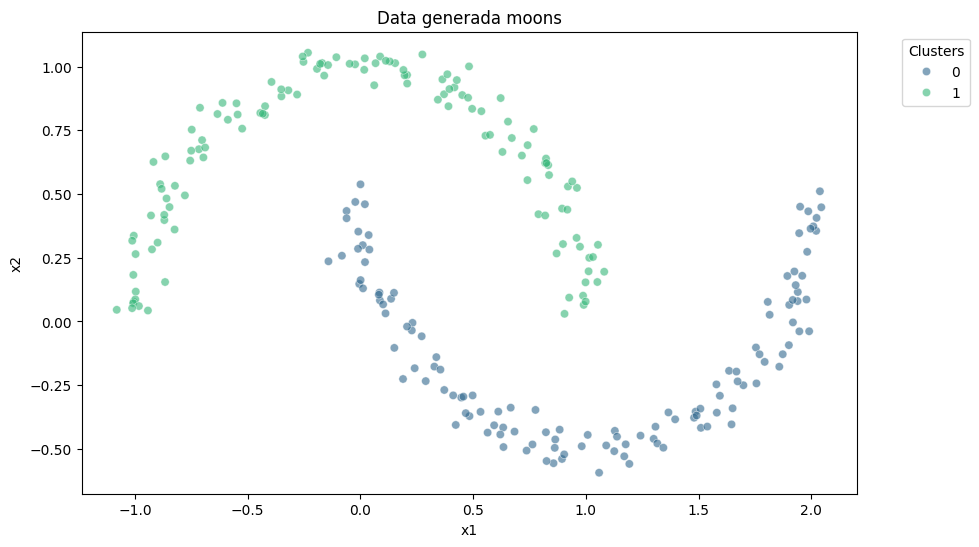

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df_moons, palette='viridis', alpha=0.6)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Data generada moons')
plt.show()

In [9]:
model = DBSCAN(eps=0.5, min_samples=4)
y_m_pred = model.fit_predict(X)
df['cluster'] = y_m_pred
df.head()

,x1,x2,y,cluster
0,-7.918909,6.760982,3,0
1,-9.037137,-6.923545,2,-1
2,6.391721,1.326531,1,-1
3,-2.822884,7.843474,0,1
4,-5.918656,-7.206570,2,2


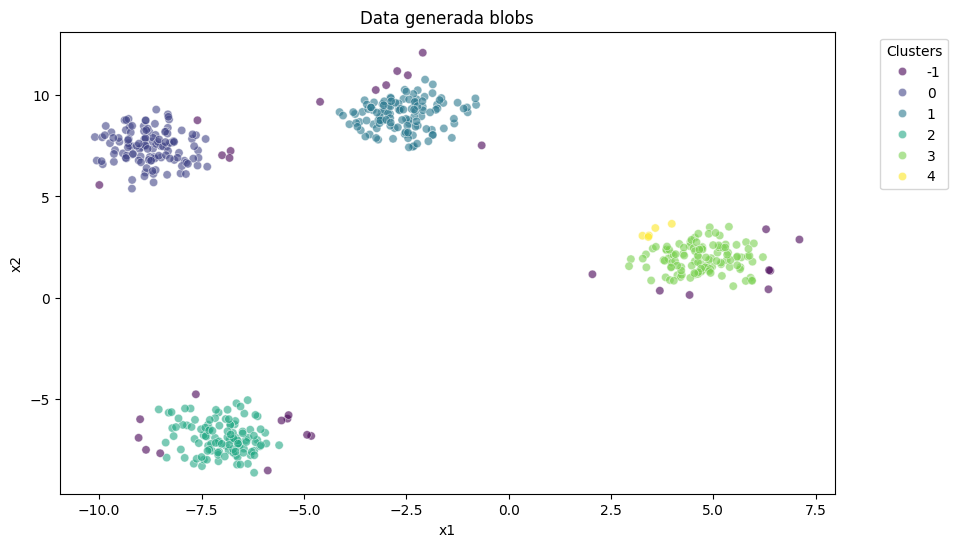

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df, palette='viridis', alpha=0.6)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Data generada blobs')
plt.show()

## Encontrar hiper-parametros

In [11]:
neighbor = NearestNeighbors(n_neighbors=3)
neighbor_fit = neighbor.fit(X)
distance, indices = neighbor_fit.kneighbors(X)

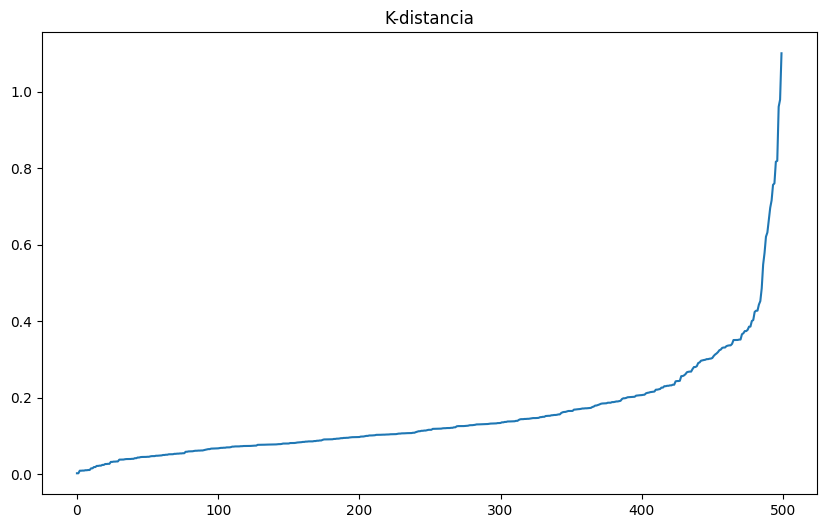

In [12]:
distances = np.sort(distance, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distancia')
plt.show()

In [13]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples_values = np.arange(2,10)

In [14]:
product_params = list(product(eps_values, min_samples_values))
product_params[:5]

[(0.25, 2), (0.25, 3), (0.25, 4), (0.25, 5), (0.25, 6)]

In [15]:
silhouette_scores = []
for i in product_params:
    model = DBSCAN(eps=i[0], min_samples=i[1])
    y_pred = model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_pred))

In [16]:
df_params = pd.DataFrame.from_records(product_params, columns=['eps', 'min_samples'])
df_params['silhouette'] = silhouette_scores
df_params.head()

,eps,min_samples,silhouette
0,0.25,2,-0.046798
1,0.25,3,-0.123333
2,0.25,4,-0.155341
3,0.25,5,-0.189153
4,0.25,6,-0.315895


In [17]:
df_params_pivot = pd.pivot_table(df_params, values='silhouette', index='min_samples', columns='eps')
df_params_pivot.head()

eps,0.25,0.35,0.45,0.55,0.65,0.75
min_samples,,,,,,
2,-0.046798,0.031230,0.190795,0.386496,0.671273,0.663743
3,-0.123333,0.163150,0.334067,0.514614,0.790896,0.796209
4,-0.155341,0.325637,0.557065,0.756089,0.790265,0.796209
5,-0.189153,0.244688,0.464244,0.746750,0.780621,0.796209
6,-0.315895,0.213551,0.616948,0.710585,0.770446,0.790978


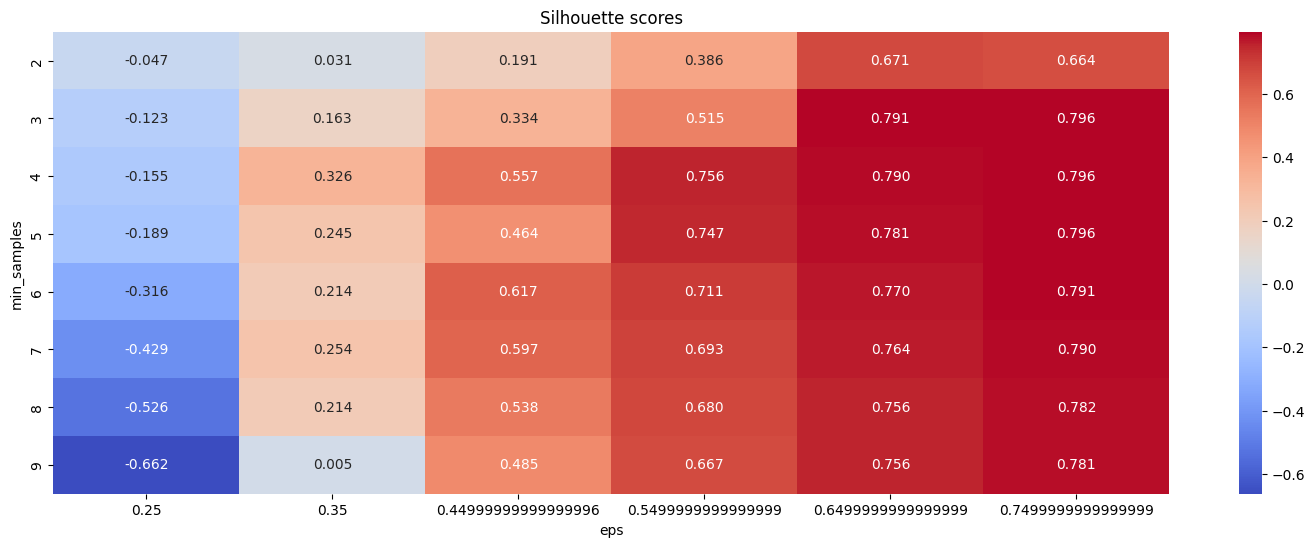

In [18]:
plt.figure(figsize=(18, 6))
sns.heatmap(df_params_pivot, cmap='coolwarm', annot=True, fmt='.3f', annot_kws={'size':10})
plt.title('Silhouette scores')
plt.show()

## Evaluando resultados de DBSCAN

In [19]:
model = DBSCAN(eps=0.75, min_samples=3)
y_m_pred = model.fit_predict(X)
df['cluster'] = y_m_pred
df.head()

,x1,x2,y,cluster
0,-7.918909,6.760982,3,0
1,-9.037137,-6.923545,2,1
2,6.391721,1.326531,1,2
3,-2.822884,7.843474,0,3
4,-5.918656,-7.206570,2,1


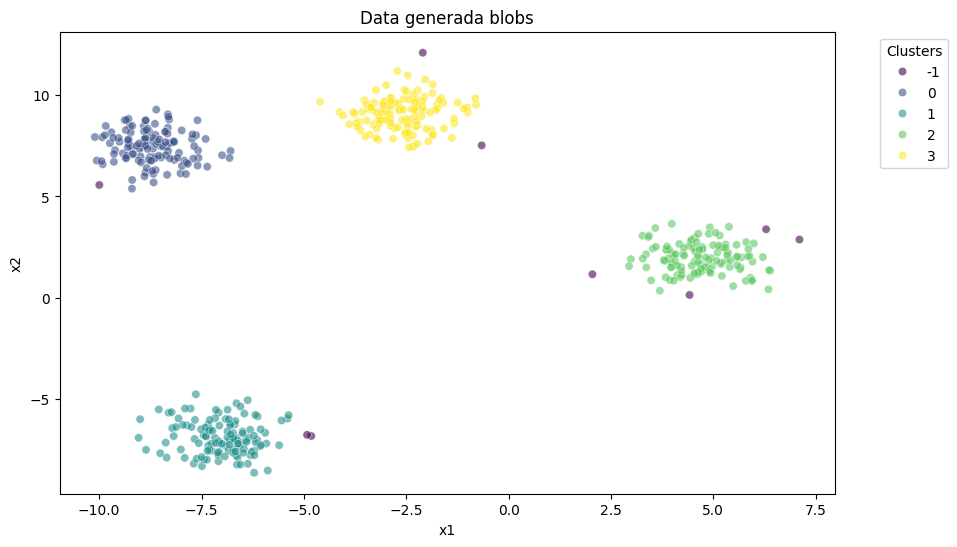

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df, palette='viridis', alpha=0.6)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Data generada blobs')
plt.show()

Para n_clusters = 8 El promedio de silhouette_score es : 0.3845971925273634


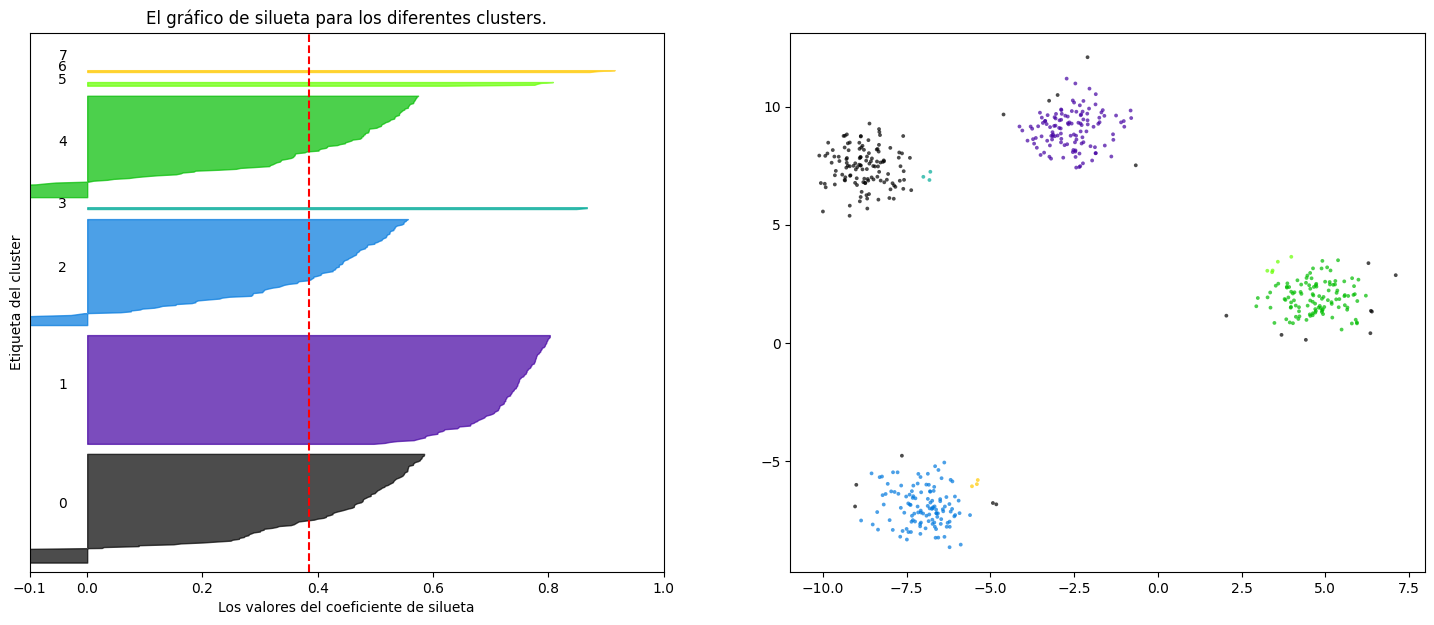

In [21]:
# Crear un subplot con 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# El primer subplot es el gráfico de silueta
# El coeficiente de silueta puede variar de -1 a 1 pero en este ejemplo todos
# están dentro de [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# Inicializar el clusterer con DBSCAN
clusterer = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

# El (n_clusters+1)*10 es para insertar espacio en blanco entre las siluetas
# gráficos de clusters individuales, para demarcarlos claramente.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# El silhouette_score da el valor promedio para todas las muestras.
# Esto da una perspectiva de la densidad y separación de los clusters formados
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "Para n_clusters =",
    n_clusters,
    "El promedio de silhouette_score es :",
    silhouette_avg,
)

# Calcular los valores de silueta para cada muestra
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Agregar los valores de silueta para las muestras pertenecientes a
    # cluster i, y ordenarlos
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Etiquetar los gráficos de silueta con sus números de cluster en el medio
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcular el nuevo y_lower para el próximo gráfico
    y_lower = y_upper + 10  # 10 para las 0 muestras

ax1.set_title("El gráfico de silueta para los diferentes clusters.")
ax1.set_xlabel("Los valores del coeficiente de silueta")
ax1.set_ylabel("Etiqueta del cluster")

# La línea vertical para el promedio de la puntuación de silueta de todos los valores
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Borrar las etiquetas / ticks del eje y
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2do Gráfico mostrando los clusters reales formados
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
plt.show()